### CNN

#### MNIST Dataset

- This dataset contains about 60,000 training images and 10,000 testing images taken from USA, this dataset is the most common dataset used in ML / DL  , since this is mostly used earlier we need to import this from csv or something but now its loaded in tensorflow we can read it directly from tensorflow..

In [3]:
import tensorflow
import warnings
warnings.filterwarnings("ignore")


- tensorflow datasets return two tuples first tuple will contain X_train,y_train, second tuple will contain X_test,y_test, and while loading you can give the split percentage for the test set.
- once you load the data as  mnist ,(X_train,y_train), (X_test,y_test) = mnist.load_data(%)



In [15]:
#How to import the dataset?

from tensorflow.keras.datasets import mnist

(X_train,y_train) , (X_test,y_test) = mnist.load_data()



In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label is:5


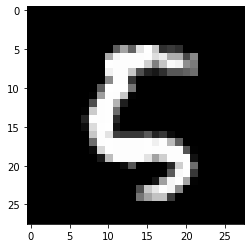

In [17]:
import matplotlib.pyplot as plt
print("Label is:{}".format(y_train[2000]))
plt.imshow(X_train[2000],cmap='gray')

- Sequential API in your tensorflow / keras takes the image input in this format , what is the format ? num_examples, height, width , channels

- 60000 X 28 X 28 , since these are gray scale images, what are the number of channels here?

- 1 is the channel.

- 60000 X 28 X 28 X 1 


In [18]:
#Reshape
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [19]:
print(X_train.shape)

(60000, 28, 28, 1)


In [20]:
print(X_test.shape)

(10000, 28, 28, 1)


In [21]:
print("Max value of X_train",X_train.max())
print("Min value of X_train",X_train.min())

Max value of X_train 255
Min value of X_train 0


#### Normalize the data:

- Its always better to normalize the data in NN
- RGB has max of 255 lets divide by 255

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/= 255
X_test/= 255


In [23]:
print("Max value of X_train",X_train.max())

Max value of X_train 1.0


In [24]:
print("Min value of X_train",X_train.min())

Min value of X_train 0.0


In [25]:

# from tensorflow.keras.datasets import mnist

# (X_train_new,y_train_new) , (X_test_new,y_test_new) = mnist.load_data()
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_new= X_train_new.flatten()
# X_train_new = sc.fit_transform(X_train_new.reshape(-1, 1))
# X_train_new = X_train_new.reshape(60000,28,28)

#### How many input neurons:  784 
#### how many ouptput neurons: 10 
####  what is the loss function: categorical_crossentropy

- We need to transform our target and peform one hot encoding


In [37]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [38]:
print(y_train.shape)

(60000, 10)


#### Lets create a Sequential Model

- Define a Seq Model 
- Add Conv , 32 filters, 3X3 , input shape is 28 X 28 X 1
- Add Conv , 32 filters, 3X3 
- flatten the data
- Dense
- Dense



 - Your weight matrix should be given as W = i/p X o/p X H X W 
 
 - Kernel = 3 -->    i/p = 1 X 32 X 3 X 3 
 
 - 32 X 32 X 3 X 3 
 

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dense ,Flatten

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

In [41]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [42]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.1453 - accuracy: 0.9560 - val_loss: 0.0779 - val_accuracy: 0.9768
Epoch 2/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0436 - accuracy: 0.9866 - val_loss: 0.0706 - val_accuracy: 0.9803
Epoch 3/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 0.0624 - val_accuracy: 0.9829
Epoch 4/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0765 - val_accuracy: 0.9811
Epoch 5/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0763 - val_accuracy: 0.9845
Epoch 6/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0093 - accuracy: 0.9968 - val_loss: 0.0838 - val_accuracy: 0.9832
Epoch 7/10
1313/1313 [==============================] - 49s 37ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0877 -

In [43]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
model.layers

In [46]:
model.layers[0].weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 8.08866248e-02, -3.36105898e-02, -8.93675238e-02,
           -3.92460749e-02, -2.26580873e-02, -1.50674552e-01,
           -2.20660090e-01,  3.64143997e-02,  1.48871928e-01,
            9.07190591e-02,  1.48062333e-01, -1.44357175e-01,
            3.77803594e-02, -3.12534600e-01, -3.29831302e-01,
           -9.62747037e-02,  1.34688288e-01, -1.36582673e-01,
            5.19097410e-02, -2.75155097e-01, -1.91639084e-02,
           -4.08454351e-02,  2.01842621e-01,  8.57015997e-02,
           -1.06847651e-01,  8.33127052e-02,  5.12151234e-02,
           -1.98334396e-01,  1.81135401e-01,  2.06326112e-01,
           -2.45759204e-01, -1.04691811e-01]],
 
         [[-4.56604473e-02,  2.94592008e-02,  4.67531122e-02,
            9.72509012e-02, -7.50147402e-02, -4.36952502e-01,
            3.77871562e-03,  3.30632068e-02,  1.12048186e-01,
           -9.32051465e-02, -1.26466647e-01, -7.45469332e-02,
       

In [47]:
model.layers[1].weights

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
 array([[[[ 0.03608446, -0.20423774, -0.13092019, ...,  0.03889749,
           -0.05610034, -0.02655639],
          [-0.3533137 , -0.13742732,  0.17865098, ...,  0.14113842,
            0.07278328,  0.07776035],
          [ 0.12818441, -0.16401462, -0.09214406, ..., -0.22605935,
           -0.0154698 , -0.28733444],
          ...,
          [ 0.06467353, -0.22321166, -0.25023395, ...,  0.00387079,
           -0.00904368, -0.21319047],
          [-0.00534313,  0.01499248, -0.08401068, ..., -0.04589044,
            0.05677158,  0.0787985 ],
          [-0.10275189,  0.08663409, -0.03695235, ...,  0.00994253,
            0.2249761 ,  0.07095925]],
 
         [[-0.00770668, -0.09174878, -0.19668435, ..., -0.00302738,
            0.09568397, -0.09646508],
          [-0.38017222, -0.35831046, -0.07106886, ...,  0.13976151,
           -0.2412061 , -0.15560792],
          [ 0.04438256, -0.14439541, -0.01466318, ...,  0

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense ,Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation = 'softmax'))

In [51]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [52]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [53]:
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 44s 33ms/step - loss: 0.1500 - accuracy: 0.9549 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 2/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 3/10
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0498 - val_accuracy: 0.9859
Epoch 4/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0463 - val_accuracy: 0.9869
Epoch 5/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.0667 - val_accuracy: 0.9828
Epoch 6/10
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 0.0445 - val_accuracy: 0.9881
Epoch 7/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0497 -

In [54]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [55]:
callbacks = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2,
                                                    min_delta=0.01)
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test),
         callbacks=[callbacks])


Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1287 - accuracy: 0.9612 - val_loss: 0.0536 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0306 - val_accuracy: 0.9907


In [56]:
#Evaluating the model

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9907


[0.03064427711069584, 0.9907000064849854]